# 1D Sod Tube

[![DownloadNotebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindflow/en/cfd_solver/mindspore_sod_tube.ipynb)&emsp;[![DownloadCode](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindflow/en/cfd_solver/mindspore_sod_tube.py)&emsp;[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/master/docs/mindflow/docs/source_en/cfd_solver/sod_tube.ipynb)

This notebook requires **MindSpore version >= 2.0.0** to support new APIs including: *mindspore.jit, mindspore.jit_class*.

The shock tube problem is a common test for the accuracy of computational fluid codes. The test consists of a one-dimensional Riemann problem, i.e, the development of an ideal gas under different conditions at the left and right ends.

## Problem Description

The definition of the Sod tube problem is:

$$
\frac{\partial}{\partial t} \left(\begin{matrix} \rho \\ \rho u \\ E \\\end{matrix} \right) + \frac{\partial}{\partial x} \left(\begin{matrix} \rho u \\ \rho u^2 + p \\ u(E + p) \\\end{matrix} \right) = 0
$$

$$
E = \frac{p}{\gamma - 1} + \frac{1}{2}\rho u^2
$$

where $\gamma = 1.4$ for ideal gas. The initial condition is

$$
\left(\begin{matrix} \rho \\ u \\ p \\\end{matrix}\right)_{x<0.5} = \left(\begin{matrix} 1.0 \\ 0.0 \\ 1.0 \\\end{matrix}\right), \quad
\left(\begin{matrix} \rho \\ u \\ p \\\end{matrix}\right)_{x>0.5} = \left(\begin{matrix} 0.125 \\ 0.0 \\ 0.1 \\\end{matrix}\right)
$$

The Neumann boundary condition is applied on both side of the tube.

The following `src` pacakage can be downloaded in [src](https://gitee.com/mindspore/mindscience/tree/master/MindFlow/applications/cfd/sod/src).

In [1]:
import mindspore as ms
from mindflow import load_yaml_config, vis_1d
from mindflow import cfd
from mindflow.cfd.runtime import RunTime
from mindflow.cfd.simulator import Simulator

from src.ic import sod_ic_1d

ms.set_context(device_target="GPU", device_id=3)

## Defining Simulator and RunTime

The mesh, material, runtime, boundary conditions and numerical methods are defined in [numeric.yaml](https://gitee.com/mindspore/mindscience/blob/master/MindFlow/applications/cfd/sod/numeric.yaml).

In [2]:
config = load_yaml_config('numeric.yaml')
simulator = Simulator(config)
runtime = RunTime(config['runtime'], simulator.mesh_info, simulator.material)

## Initial Condition

Initial condition is determined according to mesh coordinates.

In [3]:
mesh_x, _, _ = simulator.mesh_info.mesh_xyz()
pri_var = sod_ic_1d(mesh_x)
con_var = cfd.cal_con_var(pri_var, simulator.material)

## Running Simulation

Run CFD simulation with time marching.

In [4]:
while runtime.time_loop(pri_var):
    pri_var = cfd.cal_pri_var(con_var, simulator.material)
    runtime.compute_timestep(pri_var)
    con_var = simulator.integration_step(con_var, runtime.timestep)
    runtime.advance()

current time = 0.000000, time step = 0.007606
current time = 0.007606, time step = 0.005488
current time = 0.013094, time step = 0.004744
current time = 0.017838, time step = 0.004501
current time = 0.022339, time step = 0.004338
current time = 0.026678, time step = 0.004293
current time = 0.030971, time step = 0.004268
current time = 0.035239, time step = 0.004198
current time = 0.039436, time step = 0.004157
current time = 0.043593, time step = 0.004150
current time = 0.047742, time step = 0.004075
current time = 0.051818, time step = 0.004087
current time = 0.055905, time step = 0.004056
current time = 0.059962, time step = 0.004031
current time = 0.063993, time step = 0.004021
current time = 0.068014, time step = 0.004048
current time = 0.072062, time step = 0.004039
current time = 0.076101, time step = 0.004016
current time = 0.080117, time step = 0.004049
current time = 0.084166, time step = 0.004053
current time = 0.088218, time step = 0.004045
current time = 0.092264, time step

## Post Processing

You can view the density, pressure and velocity.

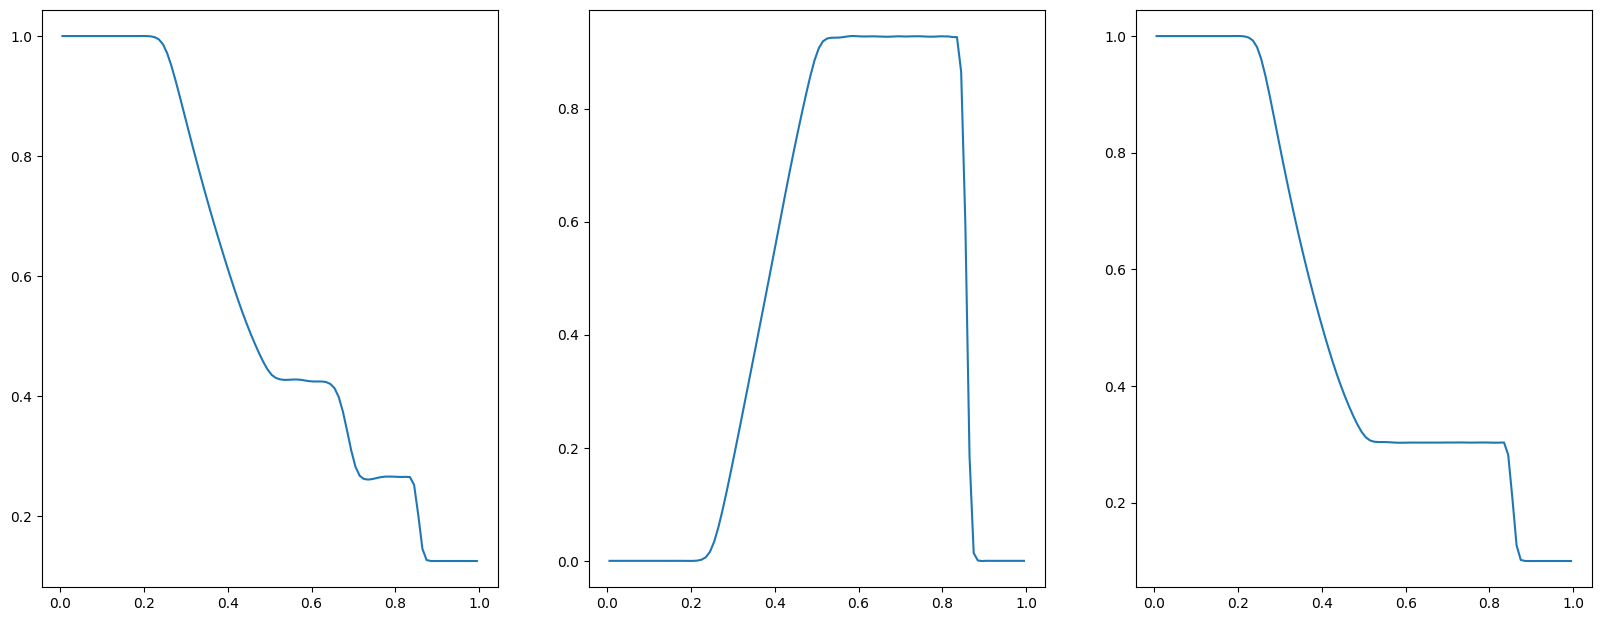

In [5]:
pri_var = cfd.cal_pri_var(con_var, simulator.material)
vis_1d(pri_var, 'sod.jpg')